## Linear Regression

### Normal Equations Method

$$y = wx + b$$
$$ Xw = y $$ 

First we generate some random dataset for model training.

In [1]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)

m = 100 # dataset sample length

# generate some random data for training
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = add_dummy_feature(X, value=1) # add intercept term x_0 = 1

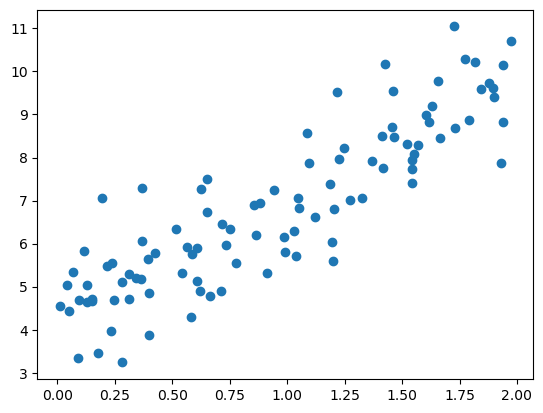

In [2]:
# now we plot this data
import matplotlib.pylab as plt

plt.scatter(X, y)
plt.show()

The normal equation to solve for values of weight parameters is 

$$ w = (X^TX)^{-1} X^T y $$

We can directly solve this equation and get the model parameters.

In [3]:
# Matrix Multiplication
A = np.array([[1, 2, 4], [2, 3, 9]])
B = np.array([[1, 3], [4, 2]])

product_B_A = B @ A
product_B_A

array([[ 7, 11, 31],
       [ 8, 14, 34]])

In [4]:
w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
w

array([[4.21509616],
       [2.77011339]])

We started with intercept term as 4 and weight term as 3 and the above calculation is close enough if not exact to the original values. So we can directly calculate the paramaters with Normal Equation.

Using these parameters we can make predictions.

In [5]:
X_new = np.array([[0], [2]]) # a column vector
X_new_b = add_dummy_feature(X_new, value=1)

# prediction
y_predict = X_new_b @ w
y_predict

array([[4.21509616],
       [9.75532293]])

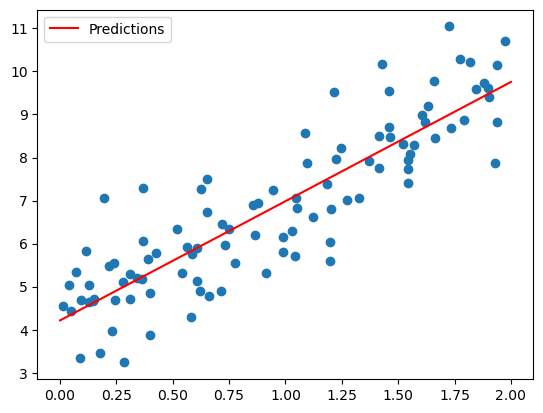

In [6]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.legend()
plt.show()

## Gradient Descent

### Batch Descent

In [ ]:
eta = 0.1 # learning rate
n_epochs = 1000 # epoch
m = len(X_b)

np.random.seed(42)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m) # we pick any random instance from our dataset
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD m = 1
        eta = learning_schedule(epoch * m + iteration)
        
        theta = theta - eta * gradients

In [11]:
theta

array([[4.21076011],
       [2.74856079]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)


sgd_reg.fit(X, y.ravel())


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.coef_, sgd_reg.intercept_

(array([2.77270267]), array([4.21278812]))

## Polynomial Regression

$y = ax^2 + bx + c$

In [ ]:
np.random.seed(42)

m = 100

X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X[0], X_poly[0] # square term is added in X_poly

(array([0.74908024]), array([0.74908024, 0.5611212 ]))

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.56140272]), array([[1.63887939, 0.5810637 ]]))

#### Learning Curve

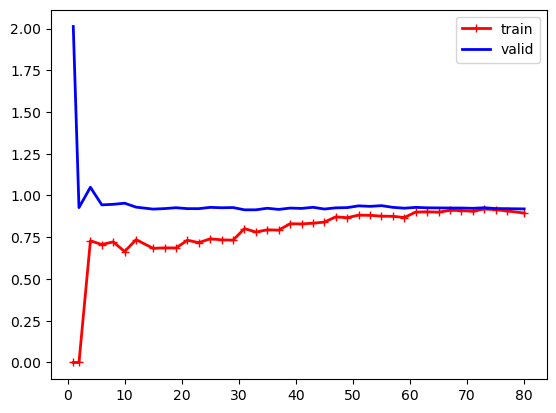

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores  = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
               scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)

valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.legend()
plt.show()

This is a case of underfitting model; and we need to come up with a better model or robust features.

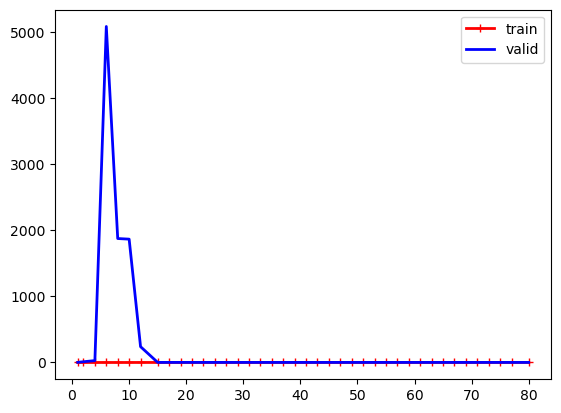

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)


# REVIEW: check this method
train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, 
                                                         X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)

valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.legend()
plt.show()

## Logistic Regression

In [29]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
iris_data = load_iris(as_frame=True)

In [26]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
iris_data.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [28]:
iris_data.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [31]:
X = iris_data.data[["petal width (cm)"]]
type(X)

pandas.core.frame.DataFrame

In [36]:
# we are only doing a binary classification for 'virginica'
y = iris_data.target_names[iris_data.target] == 'virginica'

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)